#**A Inteligência Artificial aplicada para o estudo da mortalidade infantil e sua relação com o saneamento básico no Brasil.**
---


> Leonardo Silva Pinto **RA:** 133732

> Maria Paula Henriques Prandt **RA**:148153



## Pré processamento - Extração e tratamento dos dados

In [ ]:
# Importando bibliotecas
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.tree import export_graphviz
import graphviz
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.cluster import KMeans


In [ ]:
# Conexão com o google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Extraindo dados dos municipios
data_city = pd.read_excel('/content/drive/MyDrive/Projeto IA/REGISTRO_ADMINISTRATIVO_TOTAL_2012_A_2017.xlsx', sheet_name='municipio')

In [ ]:
data_city.head()

,ANO,DESAGREGACAO,IBGE7,NOME,PMATPUB_EF,PMATPUB_EM,PMATPRI_EF,PMATPRI_EM,DIST_EF_TOTAL,DIST_EM_TOTAL,...,SNIS_CDI,PFOCOS,PFLORA,PFEM_VEREADOR,PFEM_PREFEITO,PFEM_GOVERNADOR,PFEM_DEP_ESTADUAL,PFEM_DEP_FEDERAL,PFEM_SENADOR,POP_TOT
0,2013,TOTAL,1100015,Alta Floresta D&apos;Oeste,99.26,100.00,0.74,NaN,25.8,29.6,...,100.0,0.51,66.02,20.00,0.0,NaN,NaN,NaN,NaN,25728
1,2013,TOTAL,1100023,Ariquemes,91.12,94.80,8.88,5.20,24.5,27.1,...,100.0,0.49,34.67,7.69,0.0,NaN,NaN,NaN,NaN,101269
2,2013,TOTAL,1100031,Cabixi,100.00,100.00,NaN,NaN,18.1,18.7,...,100.0,0.13,32.01,11.11,0.0,NaN,NaN,NaN,NaN,6495
3,2013,TOTAL,1100049,Cacoal,85.55,82.90,14.45,17.10,19.3,24.6,...,100.0,0.13,37.07,8.33,0.0,NaN,NaN,NaN,NaN,85863
4,2013,TOTAL,1100056,Cerejeiras,97.18,97.47,2.82,2.53,21.1,21.1,...,NaN,0.19,63.12,0.00,0.0,NaN,NaN,NaN,NaN,18041


Com auxilio de um especialista, foram defidos o uso dos seguintes atributos:
- Ano
- Nome da Cidade
- PINTERDRSAI (Percentual de internações por doenças relacionadas ao saneamento ambiental inadequado)
- SNIS_PAGUA (Percentual da população urbana residentes em domicílios ligados a rede de abastecimento de água)
- SNIS_PESGOTO (Percentual da população urbana residente em domicílios ligados à rede de esgotamento sanitário)
- SNIS_PESGTRA (Percentual de esgoto tratado)
- TXMOINF (Taxa de Mortalidade Infantil)
- PDEFSAN (Percentual de pessoas inscritas no Cadastro Único sem esgotamento sanitário adequado)
- TTREVA_EF_TOTAL (Taxa de evasão no ensino fundamental)
- TTREVA_EM_TOTAL (Taxa de evasão no ensino médio)
- DOCSUP_EF_TOTAL	(Percentual de docentes do fundamental com formação adequada)
- DOCSUP_EM_TOTAL	(Percentual de docentes do médio com formação adequada)
- TXNASC7C (Percentual de Nascidos Vivos com pelo menos 7 consultas pré-natal)
- TXNBAIXOP (Percentual de nascidos Vivos com baixo pelo ao nascer)
- TXMAE10A14 (Percentual de meninas de 10 a 14 anos de idade que tiveram filhos)
- TXMAE15A19 (Percentual de meninas de 15 a 19 anos de idade que tiveram filhos)
- REN_PIBPC_D (Produto Interno Bruto per capita)
- REN_TRPCBF_D	(Transferência per capita do Bolsa Família)
- PIND_POS	(Percentual de extremamente pobres no Cadastro Único pós Bolsa Família)
- POP_TOT (População Total)




In [ ]:
#Seleção dos atributos a serem utilizados
data_city_ = data_city.loc[:, ['ANO','NOME','PINTERDRSAI', 'SNIS_PAGUA', 'SNIS_PESGOTO', 'SNIS_PESGTRA', 'TXMOINF','PDEFSAN','TTREVA_EF_TOTAL', 'TTREVA_EM_TOTAL', 'DOCSUP_EF_TOTAL','DOCSUP_EM_TOTAL', 'TXNASC7C', 'TXNBAIXOP', 'TXMAE10A14', 'TXMAE15A19', 'REN_PIBPC_D','REN_TRPCBF_D','PIND_POS','POP_TOT']]
data_city_

,ANO,NOME,PINTERDRSAI,SNIS_PAGUA,SNIS_PESGOTO,SNIS_PESGTRA,TXMOINF,PDEFSAN,TTREVA_EF_TOTAL,TTREVA_EM_TOTAL,DOCSUP_EF_TOTAL,DOCSUP_EM_TOTAL,TXNASC7C,TXNBAIXOP,TXMAE10A14,TXMAE15A19,REN_PIBPC_D,REN_TRPCBF_D,PIND_POS,POP_TOT
0,2013,Alta Floresta D&apos;Oeste,11.119403,67.59,NaN,NaN,18.324607,NaN,3.4,9.2,48.1,46.0,64.397906,3.926702,0.785340,19.895288,11.10,111.29,NaN,25728
1,2013,Ariquemes,2.586370,41.20,NaN,NaN,11.487304,NaN,3.0,9.1,57.7,57.9,55.804111,7.799274,0.725514,21.342201,14.88,77.75,NaN,101269
2,2013,Cabixi,7.641921,56.44,NaN,NaN,13.513514,NaN,1.5,6.9,68.4,64.9,52.702703,6.756757,1.351351,13.513514,12.42,108.25,NaN,6495
3,2013,Cacoal,3.684514,100.00,55.42,100.0,15.189873,NaN,2.4,9.3,54.5,56.6,68.776371,6.413502,0.590717,18.396624,13.97,77.67,NaN,85863
4,2013,Cerejeiras,15.279188,48.67,NaN,NaN,11.070111,NaN,2.5,8.5,71.1,58.3,58.302583,3.690037,1.107011,21.402214,16.39,81.75,NaN,18041
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27845,2017,Vianópolis,8.288565,100.00,NaN,NaN,5.102041,10.92,NaN,NaN,58.0,46.3,72.448980,9.183673,1.020408,14.285714,NaN,44.08,2.31,13675
27846,2017,Vicentinópolis,2.088773,NaN,NaN,NaN,0.000000,2.06,NaN,NaN,58.1,35.0,83.636364,6.363636,NaN,19.090909,NaN,103.93,24.65,8397
27847,2017,Vila Boa,3.937008,100.00,NaN,NaN,65.573770,6.28,NaN,NaN,71.2,9.6,50.819672,14.754098,NaN,19.672131,NaN,132.19,32.73,5731
27848,2017,Vila Propício,1.117318,100.00,NaN,NaN,45.454545,24.53,NaN,NaN,40.0,18.3,51.515152,12.121212,NaN,16.666667,NaN,118.38,28.58,5690


In [ ]:
data_city_.isnull().sum()

ANO                    0
NOME                   0
PINTERDRSAI            1
SNIS_PAGUA          2388
SNIS_PESGOTO       16047
SNIS_PESGTRA       16055
TXMOINF              705
PDEFSAN             6019
TTREVA_EF_TOTAL    16712
TTREVA_EM_TOTAL    16733
DOCSUP_EF_TOTAL        0
DOCSUP_EM_TOTAL       47
TXNASC7C               1
TXNBAIXOP            643
TXMAE10A14          9075
TXMAE15A19           219
REN_PIBPC_D         5571
REN_TRPCBF_D           2
PIND_POS            5570
POP_TOT                0
dtype: int64

Para tratar os NaN, vamos ordenar a base de dados de forma crescente usando o atributo "população total" e O "PIB" da cidade, depois, vamos utilizar o método linear de interpolação

In [ ]:
data_city_ = data_city_.sort_values(by=['NOME','ANO','POP_TOT','REN_PIBPC_D'])
data_city_ = data_city_.interpolate()
data_city_

,ANO,NOME,PINTERDRSAI,SNIS_PAGUA,SNIS_PESGOTO,SNIS_PESGTRA,TXMOINF,PDEFSAN,TTREVA_EF_TOTAL,TTREVA_EM_TOTAL,DOCSUP_EF_TOTAL,DOCSUP_EM_TOTAL,TXNASC7C,TXNBAIXOP,TXMAE10A14,TXMAE15A19,REN_PIBPC_D,REN_TRPCBF_D,PIND_POS,POP_TOT
5323,2013,Abadia de Goiás,1.882353,100.0,43.24,100.00,14.814815,NaN,5.000,15.0,57.3,27.9,59.259259,7.407407,NaN,22.222222,17.62,81.25,NaN,7567
10893,2014,Abadia de Goiás,2.783300,100.0,43.93,100.00,32.679739,2.280,5.700,16.3,55.8,28.8,65.359477,15.032680,0.653595,19.607843,18.86,87.39,3.180,7733
16463,2015,Abadia de Goiás,1.818182,100.0,47.05,100.00,6.172840,1.140,4.825,14.2,59.6,28.1,62.962963,4.320988,0.605798,17.901235,15.70,84.01,7.830,7895
22033,2016,Abadia de Goiás,0.647249,100.0,49.69,100.00,35.000000,1.670,3.950,12.1,58.1,39.5,67.000000,10.500000,0.558001,21.500000,13.72,77.56,2.070,8053
27603,2017,Abadia de Goiás,1.737757,100.0,49.84,100.00,20.408163,1.080,3.075,10.0,59.6,48.5,64.285714,9.183673,0.510204,16.326531,15.19,109.10,2.720,8207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3648,2013,Óleo,4.968944,100.0,88.50,15.70,0.000000,29.075,0.900,6.0,50.6,71.1,80.769231,7.692308,2.462822,15.384615,18.92,66.84,34.685,2676
9218,2014,Óleo,2.380952,100.0,95.08,20.87,0.000000,5.210,1.700,11.5,67.8,66.7,84.615385,7.692308,3.846154,15.384615,22.92,73.01,12.200,2652
14788,2015,Óleo,5.555556,100.0,97.52,22.83,0.000000,3.210,1.700,11.5,59.2,57.8,72.000000,8.000000,4.000000,20.000000,22.86,60.57,13.960,2628
20358,2016,Óleo,3.030303,100.0,99.83,65.51,0.000000,3.140,1.700,11.5,73.3,66.7,83.870968,16.129032,4.000000,9.677419,22.66,52.05,13.430,2605


In [ ]:
data_city_.isnull().sum()

ANO                0
NOME               0
PINTERDRSAI        0
SNIS_PAGUA         0
SNIS_PESGOTO       0
SNIS_PESGTRA       0
TXMOINF            0
PDEFSAN            1
TTREVA_EF_TOTAL    0
TTREVA_EM_TOTAL    0
DOCSUP_EF_TOTAL    0
DOCSUP_EM_TOTAL    0
TXNASC7C           0
TXNBAIXOP          0
TXMAE10A14         1
TXMAE15A19         0
REN_PIBPC_D        0
REN_TRPCBF_D       0
PIND_POS           1
POP_TOT            0
dtype: int64

Provavelmente algumas linhas continuam com NaN porque existem muitos valores consecutivos NaN. Diante disso, vamos excluir essas amostras

In [ ]:
#Removendo linhas com NaN
data_city_ = data_city_.dropna()

Analisando os atributos da base de dados

In [ ]:
data_city_.describe()

,ANO,PINTERDRSAI,SNIS_PAGUA,SNIS_PESGOTO,SNIS_PESGTRA,TXMOINF,PDEFSAN,TTREVA_EF_TOTAL,TTREVA_EM_TOTAL,DOCSUP_EF_TOTAL,DOCSUP_EM_TOTAL,TXNASC7C,TXNBAIXOP,TXMAE10A14,TXMAE15A19,REN_PIBPC_D,REN_TRPCBF_D,PIND_POS,POP_TOT
count,27849.000000,27849.000000,27849.000000,27849.000000,27849.000000,27849.000000,27849.000000,27849.000000,27849.000000,27849.000000,27849.000000,27849.000000,27849.000000,27849.000000,27849.000000,27849.000000,27849.000000,27849.000000,2.784900e+04
mean,2015.000072,4.187212,92.133559,69.344381,61.067287,13.603115,17.882723,3.345537,10.861781,51.933858,53.402598,68.587990,8.137667,1.649535,19.394530,14.340181,147.255406,33.221191,3.669741e+04
std,1.414214,5.696032,16.519114,29.762109,41.118487,13.236825,16.497085,1.799911,3.920431,19.330489,17.247966,16.762040,3.285524,1.148794,6.496614,14.597295,108.516023,21.334151,2.155615e+05
min,2013.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,1.075269,0.653595,0.050787,1.298701,0.000000,0.130000,0.000000,8.120000e+02
25%,2014.000000,0.792393,92.750000,46.843750,15.384615,4.651163,4.310000,2.100000,8.250000,37.800000,41.700000,58.801498,6.146341,0.858571,14.865795,6.390000,55.640000,15.380000,5.449000e+03
50%,2015.000000,2.035623,99.850000,79.190000,78.810769,11.904762,13.090000,3.050000,10.500000,54.300000,55.400000,71.428571,7.843137,1.376381,19.178082,10.990000,114.460000,28.870000,1.150700e+04
75%,2016.000000,5.177994,100.000000,96.320000,100.000000,18.679119,27.280000,4.200000,13.075000,67.600000,66.300000,81.147541,9.583859,2.137371,23.684211,17.545000,228.450000,48.640000,2.490500e+04
max,2017.000000,77.329193,100.000000,100.000000,100.000000,285.714286,88.290000,31.100000,42.800000,100.000000,100.000000,100.000000,75.000000,17.647059,66.666667,642.070000,690.830000,98.060000,1.210692e+07


Vamos eliminar as Taxas de Mortalidade Infantil que excedem

In [ ]:
Q1 = data_city_['TXMOINF'].quantile(0.25)
Q3 = data_city_['TXMOINF'].quantile(0.75)

amplitude = Q3 - Q1

limite_inferior = Q1 - 1.5 * amplitude
limite_superior = Q3 + 1.5 * amplitude

# Removendo os outliers
data_city_ = data_city_[(data_city_['TXMOINF'] >= limite_inferior) & (data_city_['TXMOINF'] <= limite_superior)]


In [ ]:
data_city_.describe()

,ANO,PINTERDRSAI,SNIS_PAGUA,SNIS_PESGOTO,SNIS_PESGTRA,TXMOINF,PDEFSAN,TTREVA_EF_TOTAL,TTREVA_EM_TOTAL,DOCSUP_EF_TOTAL,DOCSUP_EM_TOTAL,TXNASC7C,TXNBAIXOP,TXMAE10A14,TXMAE15A19,REN_PIBPC_D,REN_TRPCBF_D,PIND_POS,POP_TOT
count,26733.000000,26733.000000,26733.000000,26733.000000,26733.000000,26733.000000,26733.000000,26733.000000,26733.000000,26733.000000,26733.000000,26733.000000,26733.000000,26733.000000,26733.000000,26733.000000,26733.000000,26733.000000,2.673300e+04
mean,2015.002918,4.185093,92.045931,69.184802,61.231229,11.856786,17.798355,3.343415,10.888175,51.932103,53.563318,68.592347,8.048266,1.614539,19.390453,14.412263,146.808885,33.244111,3.800166e+04
std,1.413364,5.685934,16.610122,29.850269,41.109236,9.412379,16.477850,1.784799,3.898291,19.342910,17.189029,16.736270,3.148539,1.109916,6.433819,14.730487,108.426219,21.340920,2.199168e+05
min,2013.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,1.075269,0.653595,0.050787,1.298701,0.000000,0.130000,0.000000,8.120000e+02
25%,2014.000000,0.798403,92.576364,46.460000,15.867619,3.875969,4.220000,2.100000,8.300000,37.800000,41.700000,58.823529,6.134969,0.842401,14.903846,6.400000,55.310000,15.405000,5.767000e+03
50%,2015.000000,2.036199,99.840000,79.091579,79.401154,11.494253,12.980000,3.050000,10.500000,54.300000,55.600000,71.494253,7.812500,1.351351,19.164619,11.040000,113.340000,28.870000,1.210100e+04
75%,2016.000000,5.167173,100.000000,96.236875,100.000000,17.543860,27.200000,4.200000,13.100000,67.600000,66.400000,81.135903,9.505703,2.095994,23.624161,17.640000,228.120000,48.660000,2.582300e+04
max,2017.000000,77.329193,100.000000,100.000000,100.000000,39.603960,88.290000,31.100000,42.800000,100.000000,100.000000,100.000000,75.000000,16.666667,66.666667,642.070000,690.830000,98.060000,1.210692e+07


### Sub Bases
Num segundo momento, optamos por realizar uma análise comparativa entre o impacto que diferentes parâmetros causam da TMI. Diante disso, separamos 3 sub-bases

- Base 1 - Base com dados sanitários
- Base 2 - Base com dados sobre educação
- Base 3 - Base com dados econômicos

As definições dos índices se encontram no relatório de formalização

In [ ]:
data_city_1 = data_city_.loc[:, ['ANO','NOME','PINTERDRSAI', 'SNIS_PAGUA', 'SNIS_PESGOTO', 'SNIS_PESGTRA', 'TXMOINF', 'PDEFSAN','REN_PIBPC_D','POP_TOT']]
data_city_2 = data_city_.loc[:, ['ANO','NOME','TTREVA_EF_TOTAL', 'TTREVA_EM_TOTAL', 'DOCSUP_EF_TOTAL', 'DOCSUP_EM_TOTAL', 'TXMOINF', 'REN_PIBPC_D','POP_TOT']]
data_city_3 = data_city_.loc[:, ['ANO','NOME','REN_TRPCBF_D', 'PIND_POS', 'TXMOINF','REN_PIBPC_D','POP_TOT']]

In [ ]:
tab_MAE = {'Fold': ['0', '1', '2', '3', '4']}
df_MAE = pd.DataFrame(tab_MAE)

## Base 1 - Dados Sanitários

### Arvore de decisao

In [ ]:
data_arv_dec1 = data_city_1.drop(['NOME','ANO','POP_TOT'], axis = 1)
X = data_arv_dec1.drop(['TXMOINF'], axis = 1)
y = data_arv_dec1.TXMOINF

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

regressor = DecisionTreeRegressor(max_depth=7)

regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae}")

MAE: 7.489878916229272


In [ ]:
dot_data1 = export_graphviz(regressor, out_file=None, filled=True, rounded=True)

graph = graphviz.Source(dot_data1)
graph.format = 'png'
graph.render("decision_tree")

'decision_tree.png'

In [ ]:
print("Relevancia dos parametros:")
for column_index, feature_importance in zip(range(X.shape[1]), regressor.feature_importances_):
    print(f"{X.columns[column_index]}: {feature_importance}")

Relevancia dos parametros:
PINTERDRSAI: 0.20240114915603344
SNIS_PAGUA: 0.09710392783252036
SNIS_PESGOTO: 0.10781525782932437
SNIS_PESGTRA: 0.0734234438154108
PDEFSAN: 0.13507214009036636
REN_PIBPC_D: 0.38418408127634474


Aqui podemos utilizar da arvore de decisão, que é um modelo mais autoexplicativo para podermos verificar quais parametros são mais importantes para definir a taxa de mortalidade, assim podemos filtrar esses parâmetros para utilizarmos na regressão

### Regressao com RNA


In [ ]:
data_rna1 = data_arv_dec1.copy()
X = data_rna1.drop(['TXMOINF'], axis = 1)
y = data_rna1.TXMOINF

kf = KFold(n_splits=5)
kf.get_n_splits(X)

for i, (train_index, test_index) in enumerate(kf.split(X)):
  print('FOLD ', i)

  # Separando os dados de Treino e Teste
  X_train, X_test, y_train, y_test = X.iloc[train_index], X.iloc[test_index], y.iloc[train_index], y.iloc[test_index]

  regressor = MLPRegressor(hidden_layer_sizes=(50,), activation='relu', solver='adam', random_state=42)
  regressor.fit(X_train, y_train)

  y_pred = regressor.predict(X_test)

  mae = mean_absolute_error(y_test, y_pred)
  print(f"MAE: {mae}")
  print('-'*30)

FOLD  0
MAE: 7.374341196390614
------------------------------
FOLD  1
MAE: 7.716332021300906
------------------------------
FOLD  2
MAE: 7.387511987875463
------------------------------
FOLD  3
MAE: 7.589464001758405
------------------------------
FOLD  4
MAE: 7.439236944026215
------------------------------


### Retirando com base na árvore de decisão

Aqui nesse exemplo retirei as duas colunas que apresentaram menor relevancia na arvore de decisao

In [ ]:
data_rna1 = data_arv_dec1.drop(['PDEFSAN','SNIS_PESGTRA'], axis=1)
X = data_rna1.drop(['TXMOINF'], axis = 1)
y = data_rna1.TXMOINF

kf = KFold(n_splits=5)
kf.get_n_splits(X)

for i, (train_index, test_index) in enumerate(kf.split(X)):
  print('FOLD ', i)

  # Separando os dados de Treino e Teste
  X_train, X_test, y_train, y_test = X.iloc[train_index], X.iloc[test_index], y.iloc[train_index], y.iloc[test_index]

  regressor = MLPRegressor(hidden_layer_sizes=(50,), activation='relu', solver='adam', random_state=42)
  regressor.fit(X_train, y_train)

  y_pred = regressor.predict(X_test)

  mae = mean_absolute_error(y_test, y_pred)
  df_MAE.loc[i, 'Base 1'] = mae
  print(f"MAE: {mae}")
  print('-'*30)

FOLD  0
MAE: 7.291483530902783
------------------------------
FOLD  1
MAE: 7.682351488911579
------------------------------
FOLD  2
MAE: 7.362061613742207
------------------------------
FOLD  3
MAE: 7.561639727181378
------------------------------
FOLD  4
MAE: 7.360853968949105
------------------------------


---
Como podermos verificar, a taxa de erro ficou menor utilizando do modelo que retira as colunas menos relevantes, o que mostra que essa abordagem pode ajudar a contruir uma regressão que prediz melhor a taxa de mortalidade. Apesar disso, nas bases a seguir não retiramos os dados menos relevantes para fazer a regressão, pois por tentativa e erro, foi entendido que não havia necessidade

## Base 2 - Dados sobre Educação

###Árvore de Decisão

In [ ]:
data_arv_dec2 = data_city_2.drop(['NOME','ANO','POP_TOT'], axis = 1)
X = data_arv_dec2.drop(['TXMOINF'], axis = 1)
y = data_arv_dec2.TXMOINF

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

regressor = DecisionTreeRegressor(max_depth=7)

regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae}")

dot_data = export_graphviz(regressor, out_file=None, filled=True, rounded=True)

graph = graphviz.Source(dot_data)
graph.format = 'png'
graph.render("decision_tree")

print("Relevancia dos parametros:")
for column_index, feature_importance in zip(range(X.shape[1]), regressor.feature_importances_):
    print(f"{X.columns[column_index]}: {feature_importance}")

MAE: 7.441460733123929
Relevancia dos parametros:
TTREVA_EF_TOTAL: 0.1632987917428767
TTREVA_EM_TOTAL: 0.11354694261587363
DOCSUP_EF_TOTAL: 0.4842799910580865
DOCSUP_EM_TOTAL: 0.11229907509621848
REN_PIBPC_D: 0.12657519948694476


###RNA

In [ ]:
data_rna2 = data_arv_dec2.copy() #drop(['DOCSUP_EM_TOTAL','REN_PIBPC_D'], axis=1)
X = data_rna2.drop(['TXMOINF'], axis = 1)
y = data_rna2.TXMOINF

kf = KFold(n_splits=5)
kf.get_n_splits(X)

for i, (train_index, test_index) in enumerate(kf.split(X)):
  print('FOLD ', i)

  # Separando os dados de Treino e Teste
  X_train, X_test, y_train, y_test = X.iloc[train_index], X.iloc[test_index], y.iloc[train_index], y.iloc[test_index]

  regressor = MLPRegressor(hidden_layer_sizes=(50,), activation='relu', solver='adam', random_state=42)
  regressor.fit(X_train, y_train)

  y_pred = regressor.predict(X_test)

  mae = mean_absolute_error(y_test, y_pred)
  df_MAE.loc[i, 'Base 2'] = mae
  print(f"MAE: {mae}")
  print('-'*30)

FOLD  0
MAE: 7.2126101216010134
------------------------------
FOLD  1
MAE: 7.63477885015259
------------------------------
FOLD  2
MAE: 7.349862837342592
------------------------------
FOLD  3
MAE: 7.501298977874973
------------------------------
FOLD  4
MAE: 7.285697923439823
------------------------------


## Base 3 - Dados Economicos

### Árvore de Decisão

In [ ]:
data_arv_dec3 = data_city_3.drop(['NOME','ANO','POP_TOT'], axis = 1)
X = data_arv_dec3.drop(['TXMOINF'], axis = 1)
y = data_arv_dec3.TXMOINF

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

regressor = DecisionTreeRegressor(max_depth=7)

regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae}")

dot_data = export_graphviz(regressor, out_file=None, filled=True, rounded=True)

graph = graphviz.Source(dot_data)
graph.format = 'png'
graph.render("decision_tree")

print("Relevancia dos parametros:")
for column_index, feature_importance in zip(range(X.shape[1]), regressor.feature_importances_):
    print(f"{X.columns[column_index]}: {feature_importance}")

MAE: 7.500351661335364
Relevancia dos parametros:
REN_TRPCBF_D: 0.7158088408573252
PIND_POS: 0.1528419858327503
REN_PIBPC_D: 0.1313491733099244


### RNA

In [ ]:
data_rna3 = data_arv_dec3.copy()
X = data_rna3.drop(['TXMOINF'], axis = 1)
y = data_rna3.TXMOINF

kf = KFold(n_splits=5)
kf.get_n_splits(X)

for i, (train_index, test_index) in enumerate(kf.split(X)):
  print('FOLD ', i)

  # Separando os dados de Treino e Teste
  X_train, X_test, y_train, y_test = X.iloc[train_index], X.iloc[test_index], y.iloc[train_index], y.iloc[test_index]

  regressor = MLPRegressor(hidden_layer_sizes=(50,), activation='relu', solver='adam', random_state=42)
  regressor.fit(X_train, y_train)

  y_pred = regressor.predict(X_test)

  mae = mean_absolute_error(y_test, y_pred)
  df_MAE.loc[i, 'Base 3'] = mae
  print(f"MAE: {mae}")
  print('-'*30)

FOLD  0
MAE: 7.239540601246799
------------------------------
FOLD  1
MAE: 7.771576183896365
------------------------------
FOLD  2
MAE: 7.360968569514588
------------------------------
FOLD  3
MAE: 7.527733894097792
------------------------------
FOLD  4
MAE: 7.3517967888509155
------------------------------


##Base Total

### Arvore de decisao

In [ ]:
data_arv_dec = data_city_.drop(['NOME','ANO','POP_TOT'], axis = 1)
X = data_arv_dec.drop(['TXMOINF'], axis = 1)
y = data_arv_dec.TXMOINF

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

regressor = DecisionTreeRegressor(max_depth=7)

regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae}")

dot_data = export_graphviz(regressor, out_file=None, filled=True, rounded=True)

graph = graphviz.Source(dot_data)
graph.format = 'png'
graph.render("decision_tree")

print("Relevancia dos parametros:")
for column_index, feature_importance in zip(range(X.shape[1]), regressor.feature_importances_):
    print(f"{X.columns[column_index]}: {feature_importance}")

MAE: 7.271746048211633
Relevancia dos parametros:
PINTERDRSAI: 0.009047009510252418
SNIS_PAGUA: 0.016224791673150968
SNIS_PESGOTO: 0.019829925984831062
SNIS_PESGTRA: 0.004140119032386412
PDEFSAN: 0.03006414868486831
TTREVA_EF_TOTAL: 0.04181373159473978
TTREVA_EM_TOTAL: 0.022859054996036104
DOCSUP_EF_TOTAL: 0.06808102631101787
DOCSUP_EM_TOTAL: 0.026769893962338157
TXNASC7C: 0.09869459232406369
TXNBAIXOP: 0.18123318922171577
TXMAE10A14: 0.06626327508973283
TXMAE15A19: 0.108579962745366
REN_PIBPC_D: 0.018559935856081382
REN_TRPCBF_D: 0.26554523613127556
PIND_POS: 0.0222941068821437


### Regressao com RNA


In [ ]:
data_rna = data_arv_dec.copy()
X = data_rna.drop(['TXMOINF'], axis = 1)
y = data_rna.TXMOINF

kf = KFold(n_splits=5)
kf.get_n_splits(X)

for i, (train_index, test_index) in enumerate(kf.split(X)):
  print('FOLD ', i)

  # Separando os dados de Treino e Teste
  X_train, X_test, y_train, y_test = X.iloc[train_index], X.iloc[test_index], y.iloc[train_index], y.iloc[test_index]

  regressor = MLPRegressor(hidden_layer_sizes=(50,), activation='relu', solver='adam', random_state=42)
  regressor.fit(X_train, y_train)

  y_pred = regressor.predict(X_test)

  mae = mean_absolute_error(y_test, y_pred)
  df_MAE.loc[i, 'Base Total'] = mae
  print(f"MAE: {mae}")
  print('-'*30)

FOLD  0
MAE: 7.079492612175462
------------------------------
FOLD  1
MAE: 7.48485704579451
------------------------------
FOLD  2
MAE: 7.113639155663323
------------------------------
FOLD  3
MAE: 7.280745544270863
------------------------------
FOLD  4
MAE: 7.0845736928844145
------------------------------


## Gráficos e Tabelas

Tabela comparativa das MAE das regressões

In [ ]:
df_MAE

,Fold,Base 1,Base 2,Base 3,Base Total
0,0,7.291484,7.212610,7.239541,7.079493
1,1,7.682351,7.634779,7.771576,7.484857
2,2,7.362062,7.349863,7.360969,7.113639
3,3,7.561640,7.501299,7.527734,7.280746
4,4,7.360854,7.285698,7.351797,7.084574


Uma MAE de 7 p.p não é muito interessante no contexto de regressão, uma vez que a média da TMI nos municípios da nossa base é de 11%. No entanto, a titulo de comparação de quais dados fornecem uma melhor regressão, os valores obtidos podem ser úteis.

Nota-se, por exemplo, que com exceção da Base Total, a base que obeteve as menores MAE foi a base 2 que se trata de dados educacionais. Ao analisar a árvore de decisão desse custer, vemos que o parâmetro de maior relevância é o DOCSUP_EF_TOTAL	(Percentual de docentes do fundamental com formação adequada).


Text(0.5, 1.0, 'Variação da MAE nas regressões com diferentes bases')

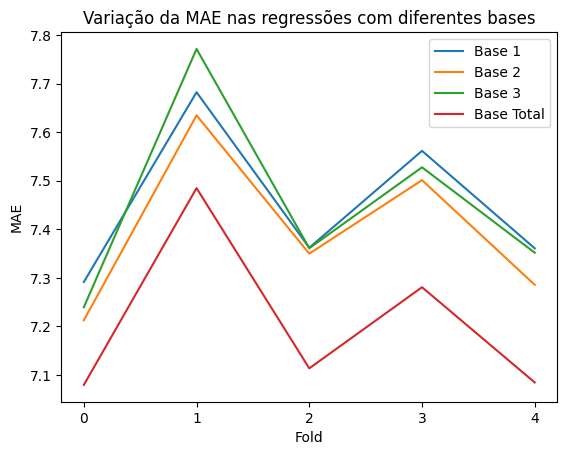

In [ ]:
# Grafico de Linhas usando o matplot
plt.plot(df_MAE['Fold'], df_MAE['Base 1'], label='Base 1')
plt.plot(df_MAE['Fold'], df_MAE['Base 2'], label='Base 2')
plt.plot(df_MAE['Fold'], df_MAE['Base 3'], label='Base 3')
plt.plot(df_MAE['Fold'], df_MAE['Base Total'], label='Base Total')

plt.xlabel('Fold')
plt.ylabel('MAE')
plt.legend()
plt.title('Variação da MAE nas regressões com diferentes bases')

Nota-se que as menores MAE são obtidas na regressão realizada com a base total de dados. Já nas sub-bases, tem-se que as menores MAE foram obtidas na base 2 que se refere a dados Educaionais.

Ainda que o melhor resultado não tenha sido derivado da base de dados referente a saneamento básico, será feita uma análise mais profunda desses parâmetros

###**Hipóteses e Busca por Exceções**


Hipótese: Cidades com menos população e com os menores pib tem os menores SNIS_PESGOTO (Percentual da população urbana residente em domicílios ligados à rede de esgotamento sanitário). Essa verdade se repete para TMI (essas cidades tem as maiores TMI)


Para fazer essa análise, vamos pegar apenas cidades que não possuem dados faltantes na base original, ou seja, que não tiveram nenhuma métrica estimada pelo presente trabalho

Também foi optado por analisar as TMI acima e abaixo da média pois foi observado que as cidades com pequenas populações (abaixo do 3Q) e com altas TMI (acima do 3Q) possuem dados faltantes ao longo dos anos.

In [ ]:
df_cidades = data_city.loc[:, ['ANO','NOME', 'SNIS_PESGOTO','REN_PIBPC_D','POP_TOT', 'TXMOINF']]
df_cidades = df_cidades.dropna()

df_hipotese = df_cidades.sort_values(['POP_TOT', 'REN_PIBPC_D'], ascending=[True, True])
df_hipotese = df_hipotese.query('SNIS_PESGOTO <= 69')
df_hipotese = df_hipotese.query('SNIS_PESGOTO >= 46')
#df_hipotese = df_hipotese.query('TXMOINF <= 12')
df_hipotese = df_hipotese.query('TXMOINF >= 3.8')

df_menores_1 = df_hipotese.head(20)

df = pd.DataFrame(df_menores_1['NOME'])
df['SNIS_PESGOTO'] = df_menores_1['SNIS_PESGOTO']
df['TMI_'] = df_menores_1['TXMOINF']

df['Status_PESGOTO'] = np.where(df_menores_1['SNIS_PESGOTO'] <= 69, 'Abaixo da média', 'Acima da média')
df['Status_TMI'] = np.where(df_menores_1['TXMOINF'] >= 11.8 , 'Acima da média', 'Abaixo da média')

df

,NOME,SNIS_PESGOTO,TMI_,Status_PESGOTO,Status_TMI
6973,Riacho de Santo Antônio,54.99,46.511628,Abaixo da média,Acima da média
19746,Simão Pereira,49.49,45.454545,Abaixo da média,Acima da média
4523,Rancho Queimado,57.57,83.333333,Abaixo da média,Acima da média
10093,Rancho Queimado,58.41,80.000000,Abaixo da média,Acima da média
15663,Rancho Queimado,59.69,33.333333,Abaixo da média,Acima da média
21233,Rancho Queimado,63.37,33.333333,Abaixo da média,Acima da média
18235,Fernando de Noronha,53.30,38.461538,Abaixo da média,Acima da média
13692,Glaucilândia,55.83,55.555556,Abaixo da média,Acima da média
9316,Ribeira,59.06,63.829787,Abaixo da média,Acima da média
3734,Quadra,67.08,50.000000,Abaixo da média,Acima da média


Note que não necessariamente, as cidades com menores populações e com menores PIB tem menos residencias com esgoto tratado. Portanto a hipótese não é válida.

Diante disso, vamos pegar uma única amostra cuja a hipótese é valida e analisar mais a fundo e buscar novas informações. Nesse caso, escolhemos a cidade Santiago do Sul que tem uma TMI acima do 3Q e um SNIS_PESGOTO abaixo do 1Q

In [ ]:
Rancho = df_cidades[df_cidades['NOME'] == 'Rancho Queimado']
Rancho

,ANO,NOME,SNIS_PESGOTO,REN_PIBPC_D,POP_TOT,TXMOINF
4523,2013,Rancho Queimado,57.57,27.16,2827,83.333333
10093,2014,Rancho Queimado,58.41,25.52,2838,80.000000
15663,2015,Rancho Queimado,59.69,25.91,2849,33.333333
21233,2016,Rancho Queimado,63.37,24.87,2860,33.333333


Text(0.5, 1.0, 'TMI por ano de Rancho Queimado')

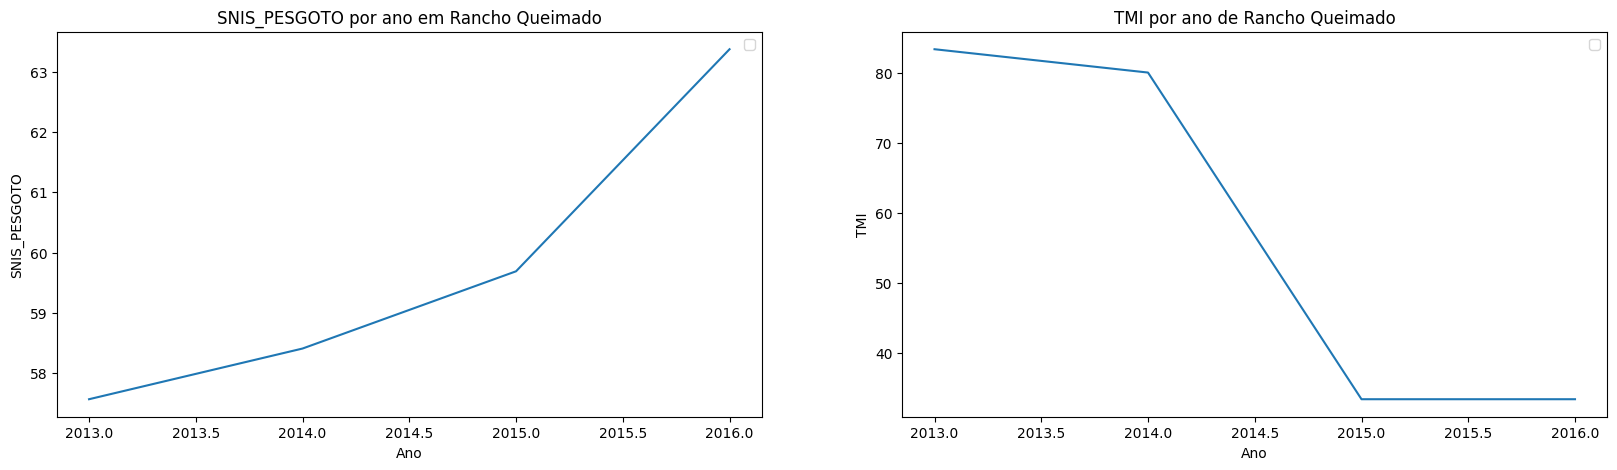

In [ ]:
# Plotando o gráfico de linha

plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(Rancho['ANO'],Rancho['SNIS_PESGOTO'])
plt.xlabel('Ano')
plt.ylabel('SNIS_PESGOTO')
plt.legend()
plt.title('SNIS_PESGOTO por ano em Rancho Queimado')


plt.subplot(1,2,2)
plt.plot(Rancho['ANO'],Rancho['TXMOINF'])
plt.xlabel('Ano')
plt.ylabel('TMI')
plt.legend()
plt.title('SNIS_PESGOTO por ano em Rancho Queimado')

plt.title('TMI por ano de Rancho Queimado')




Note que ao longo do tempo, o percentual de residencias com esgoto tratado aumentou e a taxa de mortalidade infantil diminuiiu.

## Clusterização - Base 1

Vamos fazer a clusterização usando variáveis de saneamento básico e, com os grupos criados, podemos entender como a TMI se comporta nesses grupos

In [ ]:
#Copia do dataframe sem a coluna de nome
df_data_city = data_city_.drop('NOME', axis=1)
cluster_data = df_data_city.loc[:, ['PDEFSAN', 'PINTERDRSAI', 'REN_PIBPC_D', 'SNIS_PAGUA']]


In [ ]:
cluster_data = cluster_data.values

kmeans = KMeans(n_clusters=4)

# Treinamento
kmeans.fit(cluster_data)
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

# Imprime os centróides e os clusters
for i in range(4):
    print("Cluster", i+1)
    cluster_points = cluster_data[labels == i]
    print("Pontos:", cluster_points)
    print("Centróide:", centroids[i])
    print()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1
Pontos: [[  2.28         2.7833002   18.86       100.        ]
 [  1.14         1.81818182  15.7        100.        ]
 [  1.67         0.64724919  13.72       100.        ]
 ...
 [  3.21         5.55555556  22.86       100.        ]
 [  3.14         3.03030303  22.66       100.        ]
 [  2.59         0.          22.66       100.        ]]
Centróide: [ 8.23758479  3.2026946  15.3106282  96.47051379]

Cluster 2
Pontos: [[10.58        0.33557047 11.55       59.3       ]
 [10.31        0.78277886 10.38       48.30333333]
 [ 9.57        0.77071291  7.725      37.30666667]
 ...
 [53.96       14.77236549  7.64       63.47      ]
 [52.25       17.79084158  8.03       61.97      ]
 [52.94       15.41654314 13.475      61.81      ]]
Centróide: [27.99027815  7.53547752  8.99365112 42.4541088 ]

Cluster 3
Pontos: [[ 25.74         1.75438596  21.55       100.        ]
 [ 25.28        10.79429735   3.81        73.09      ]
 [ 47.59        13.04347826   4.54        76.77      ]
 ...
 [ 3

In [ ]:
#Adicionando a legenda dos clusteres na base de dados
data_city_['Cluster'] = labels

In [ ]:
#Separando a base em clusters
cluster_1 = data_city_[data_city_['Cluster'] == 0]
cluster_2 = data_city_[data_city_['Cluster'] == 1]
cluster_3 = data_city_[data_city_['Cluster'] == 2]
cluster_4 = data_city_[data_city_['Cluster'] == 3]

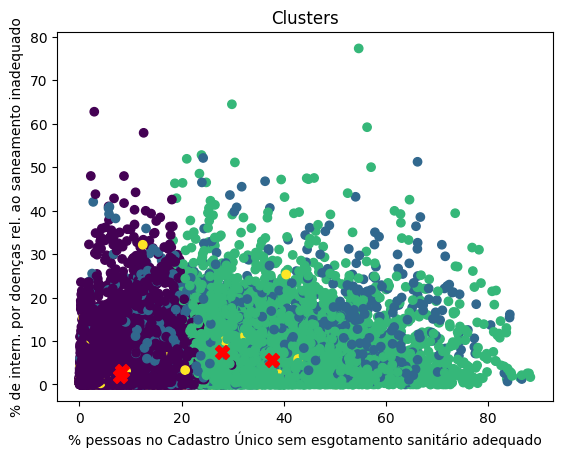

In [ ]:
# Plotar os pontos de dados coloridos por cluster
plt.scatter(cluster_data[:, 0], cluster_data[:, 1], c=labels, cmap='viridis')

# Plotar os centroides dos clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='X', color='red', s=100)

# Configurações do gráfico
plt.xlabel('% pessoas no Cadastro Único sem esgotamento sanitário adequado')
plt.ylabel('% de intern. por doenças rel. ao saneamento inadequado')
plt.title('Clusters')

# Exibir o gráfico
plt.show()

Vamos analisar a TMI de cada cluster

Vamos calcular a média da TMI por ano de cada cluster

In [ ]:
#Separando a base em clusters

media_cluster1 = pd.DataFrame(cluster_1.groupby('ANO')['TXMOINF'].mean())
media_cluster2 = pd.DataFrame(cluster_2.groupby('ANO')['TXMOINF'].mean())
media_cluster3 = pd.DataFrame(cluster_3.groupby('ANO')['TXMOINF'].mean())
media_cluster4 = pd.DataFrame(cluster_4.groupby('ANO')['TXMOINF'].mean())


media_cluster1['Esgoto Tratado'] = cluster_1.groupby('ANO')['SNIS_PESGOTO'].mean()
media_cluster2['Esgoto Tratado'] = cluster_2.groupby('ANO')['SNIS_PESGOTO'].mean()
media_cluster3['Esgoto Tratado'] = cluster_3.groupby('ANO')['SNIS_PESGOTO'].mean()
media_cluster4['Esgoto Tratado'] = cluster_4.groupby('ANO')['SNIS_PESGOTO'].mean()




Text(0.5, 1.0, 'TMI por ano de cada cluster')

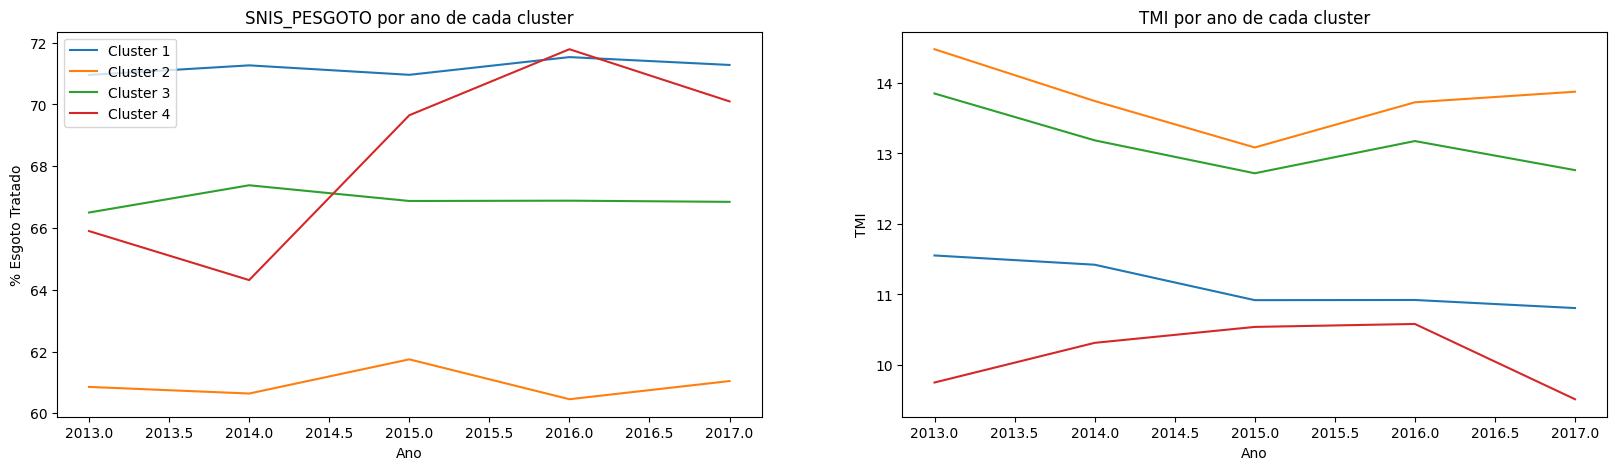

In [ ]:
# Plotando o gráfico de linha

plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(media_cluster1['Esgoto Tratado'], label='Cluster 1')
plt.plot(media_cluster2['Esgoto Tratado'], label='Cluster 2')
plt.plot(media_cluster3['Esgoto Tratado'], label='Cluster 3')
plt.plot(media_cluster4['Esgoto Tratado'], label='Cluster 4')
plt.xlabel('Ano')
plt.ylabel('% Esgoto Tratado')
plt.legend()
plt.title('SNIS_PESGOTO por ano de cada cluster')


plt.subplot(1,2,2)
plt.plot(media_cluster1['TXMOINF'], label='Cluster 1')
plt.plot(media_cluster2['TXMOINF'], label='Cluster 2')
plt.plot(media_cluster3['TXMOINF'], label='Cluster 3')
plt.plot( media_cluster4['TXMOINF'], label='Cluster 4')
plt.xlabel('Ano')
plt.ylabel('TMI')
plt.title('TMI por ano de cada cluster')




É interessante notar que as cidades do cluster 1, em média, tem os menores percentuais de população urbana residente em domicílios ligados à rede de esgotamento sanitário e as maiores médias de TMI ao longo dos anos.

Por outro lado, nota-se que, de 2014 a 2016, no cluster 4, houve um aumento expressivo no percentual da população residente em domicilios com acesso a rede esgoto, porém um movimento de queda na TMI começou apenas a partir de 2016. Uma hipótese é que o retorno dos benefícios do maior acesso a rede esgoto seja expressivo apenas com o passar dos anos.

Outro ponto interessante, é que não necessáriamente o cluster com maior percentual da população com acesso a rediencias com esgoto tratado é o cluster com as menores TMI.

# Rascunho

## Regressao

Aqui iremos utilizar de regressão com um protocolo de validação cruzada utilizando K-fold para encontrar a TMI

In [ ]:
# Retirando dados que nao serao usados na regressao
data_lr = data_city_.drop(['NOME','ANO','POP_TOT'], axis = 1)

In [ ]:
# tabela de correlacao
corr = data_lr.corr()
corr

In [ ]:
x = data_lr.drop(['TXMOINF'], axis = 1)
y = data_lr.TXMOINF

kf = KFold(n_splits=5)
kf.get_n_splits(x)

for i, (train_index, test_index) in enumerate(kf.split(x)):
  print('FOLD ', i)

  # Separando os dados de Treino e Teste
  x_train, x_test, y_train, y_test = x.iloc[train_index], x.iloc[test_index], y.iloc[train_index], y.iloc[test_index]

  # Criando o regressor
  lr = LinearRegression()

  # Treinando o Modelo
  lr.fit(x_train,y_train);

  # Aqui são os pesos que cada variavel influenciou na TMI
  coeff_df = pd.DataFrame(lr.coef_,x.columns,columns=['Coefficient'])
  print('\nPesos')
  for index in coeff_df.index:
    print(f">{index}: {coeff_df.loc[index][0]}")

  # Algumas medidas de acurácia
  y_pred = lr.predict(x_test)
  print('\nMAE:', metrics.mean_absolute_error(y_test, y_pred))
  print('MSE:', metrics.mean_squared_error(y_test, y_pred))
  print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
  print('-'*30)

Agora vamos realizar novas regressões com as sub-bases feitas a fim de realizar uma análise comparativa.

In [ ]:
data_lr = data_city_1.drop(['NOME','ANO','POP_TOT'], axis = 1)
x = data_lr.drop(['TXMOINF'], axis = 1)
y = data_lr.TXMOINF

kf = KFold(n_splits=5)
kf.get_n_splits(x)

for i, (train_index, test_index) in enumerate(kf.split(x)):
  print('FOLD ', i)

  # Separando os dados de Treino e Teste
  x_train, x_test, y_train, y_test = x.iloc[train_index], x.iloc[test_index], y.iloc[train_index], y.iloc[test_index]

  # Criando o regressor
  lr = LinearRegression()

  # Treinando o Modelo
  lr.fit(x_train,y_train);

  # Aqui são os pesos que cada variavel influenciou na TMI
  coeff_df = pd.DataFrame(lr.coef_,x.columns,columns=['Coefficient'])
  print('\nPesos')
  for index in coeff_df.index:
    print(f">{index}: {coeff_df.loc[index][0]}")

  # Algumas medidas de acurácia
  y_pred = lr.predict(x_test)
  print('\nMAE:', metrics.mean_absolute_error(y_test, y_pred))
  print('MSE:', metrics.mean_squared_error(y_test, y_pred))
  print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
  print('-'*30)

In [ ]:
data_lr = data_city_2.drop(['NOME','ANO','POP_TOT'], axis = 1)
x = data_lr.drop(['TXMOINF'], axis = 1)
y = data_lr.TXMOINF

kf = KFold(n_splits=5)
kf.get_n_splits(x)

for i, (train_index, test_index) in enumerate(kf.split(x)):
  print('FOLD ', i)

  # Separando os dados de Treino e Teste
  x_train, x_test, y_train, y_test = x.iloc[train_index], x.iloc[test_index], y.iloc[train_index], y.iloc[test_index]

  # Criando o regressor
  lr = LinearRegression()

  # Treinando o Modelo
  lr.fit(x_train,y_train);

  # Aqui são os pesos que cada variavel influenciou na TMI
  coeff_df = pd.DataFrame(lr.coef_,x.columns,columns=['Coefficient'])
  print('\nPesos')
  for index in coeff_df.index:
    print(f">{index}: {coeff_df.loc[index][0]}")

  # Algumas medidas de acurácia
  y_pred = lr.predict(x_test)
  print('\nMAE:', metrics.mean_absolute_error(y_test, y_pred))
  print('MSE:', metrics.mean_squared_error(y_test, y_pred))
  print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
  print('-'*30)

In [ ]:
data_lr = data_city_3.drop(['NOME','ANO','POP_TOT'], axis = 1)
x = data_lr.drop(['TXMOINF'], axis = 1)
y = data_lr.TXMOINF

kf = KFold(n_splits=5)
kf.get_n_splits(x)

for i, (train_index, test_index) in enumerate(kf.split(x)):
  print('FOLD ', i)

  # Separando os dados de Treino e Teste
  x_train, x_test, y_train, y_test = x.iloc[train_index], x.iloc[test_index], y.iloc[train_index], y.iloc[test_index]

  # Criando o regressor
  lr = LinearRegression()

  # Treinando o Modelo
  lr.fit(x_train,y_train);

  # Aqui são os pesos que cada variavel influenciou na TMI
  coeff_df = pd.DataFrame(lr.coef_,x.columns,columns=['Coefficient'])
  print('\nPesos')
  for index in coeff_df.index:
    print(f">{index}: {coeff_df.loc[index][0]}")

  # Algumas medidas de acurácia
  y_pred = lr.predict(x_test)
  print('\nMAE:', metrics.mean_absolute_error(y_test, y_pred))
  print('MSE:', metrics.mean_squared_error(y_test, y_pred))
  print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
  print('-'*30)

Aqui foram feitos apenas alguns primeiros testes e rascunhos plotando os gráficos

Gráfico de dispersão da TMI das cidades de cada cluster